# In Class Notebook, Week 07

You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import bqplot
import numpy as np

## Intro to Maps with bqplot
(and its limitations)

In [3]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

#2. scales
sc_geo = bqplot.Mercator() # not a great projection!!

# 3 marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together!
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

#2. scales
sc_geo = bqplot.Gnomonic() # nightmare projection!

# 3 marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together!
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [8]:
# 1. data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection
#sc_geo = bqplot.Gnomonic() # world projection

# 3. marks
state_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

fig = bqplot.Figure(marks=[state_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [10]:
# 1. data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# tooltip
tt = bqplot.Tooltip(fields=['id','name'])

# 3. marks
state_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo},tooltip=tt)

# 4. interactions
state_map.interactions = {'click':'select','hover':'tooltip'}

fig = bqplot.Figure(marks=[state_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [11]:
!ls /Users/jnaiman/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [12]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

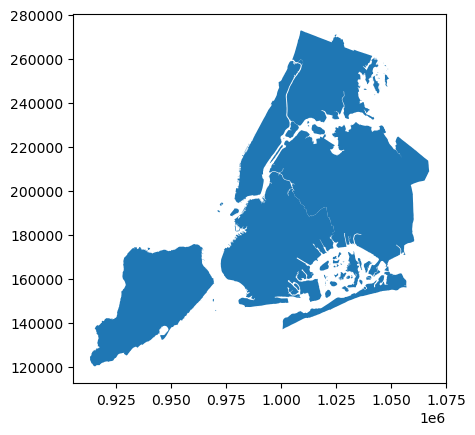

In [13]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df.plot()

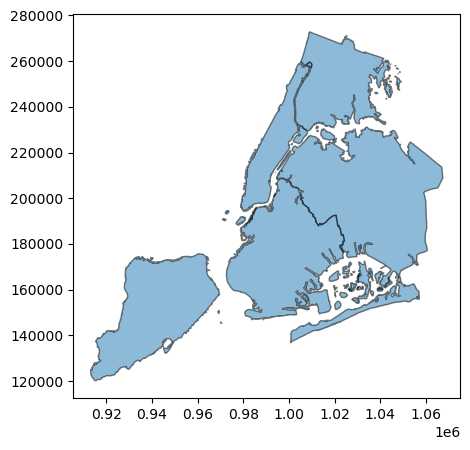

In [14]:
ax = df.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

In [15]:
councils = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/1/query?outFields=*&where=1%3D1&f=geojson')

In [16]:
councils.head()

,OBJECTID_1,District,Council_me,Shape.STArea(),Shape.STLength(),geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [17]:
councils.describe()

,OBJECTID_1,Shape.STArea(),Shape.STLength()
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.298582e+08,115689.972103
std,1.581139,6.161040e+07,61814.979912
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.838498e+08,144362.359386
max,815.000000,2.009197e+08,211060.175261


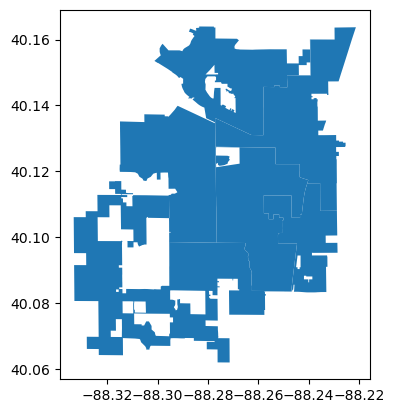

In [18]:
councils.plot()

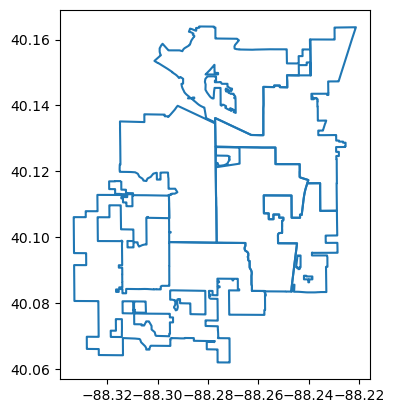

In [19]:
councils.boundary.plot()

In [20]:
councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [21]:
councils.centroid

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [22]:
councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
props = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/2/query?outFields=*&where=1%3D1&f=geojson')

In [24]:
props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,Shape.STArea(),Shape.STLength(),geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497936,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800333,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196446,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292805,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671149,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


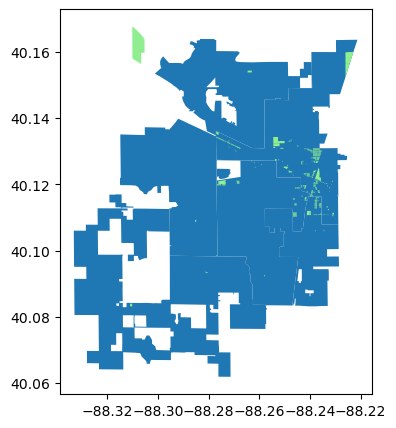

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
councils.plot(ax=ax)
props.plot(ax=ax, color='lightgreen')
plt.show()

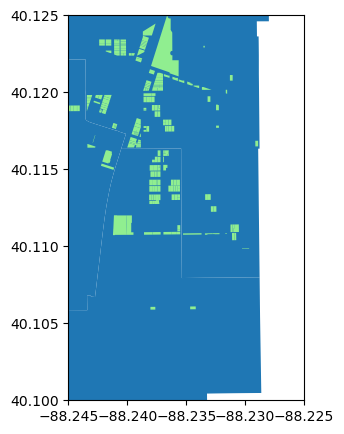

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
councils.plot(ax=ax)
props.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

## Other public datasets

In [28]:
states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')

In [29]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


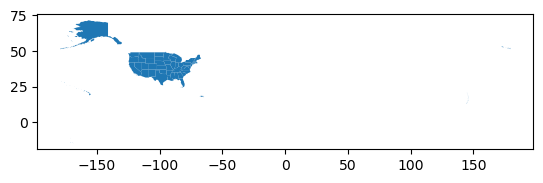

In [30]:
states.plot()

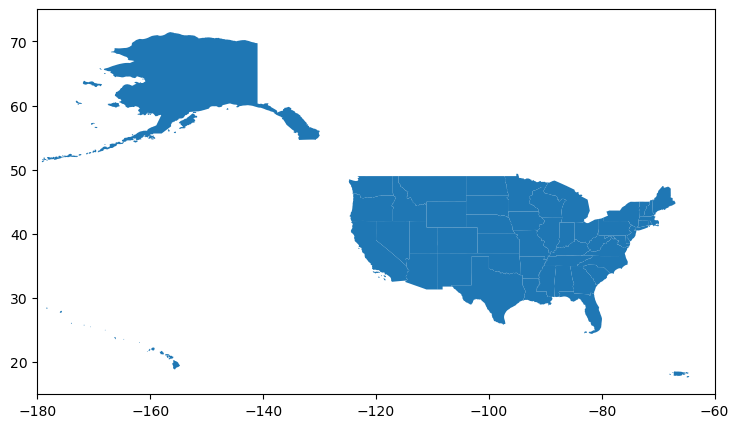

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
states.plot(ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [33]:
naland = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/AIANNH/tl_2021_us_aiannh.zip')

In [34]:
naland.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89736 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


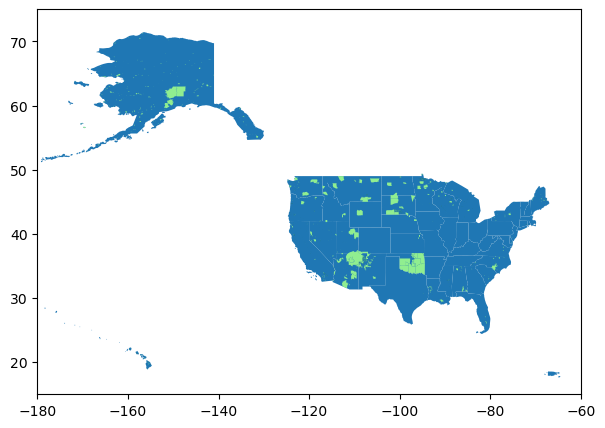

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
states.plot(ax=ax)
naland.plot(ax=ax,color='lightgreen')
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [36]:
naland['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

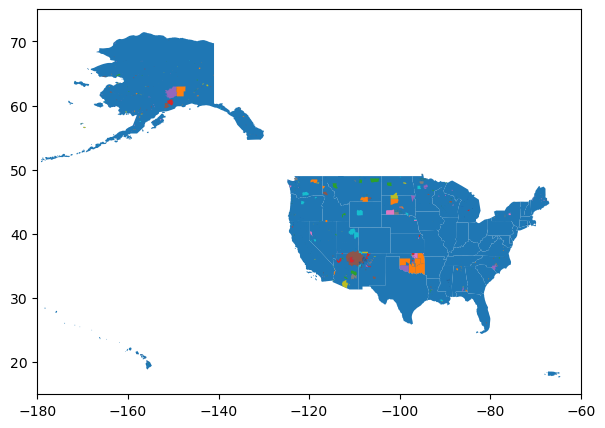

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
states.plot(ax=ax)
naland.plot(ax=ax, column='NAMELSAD')
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [38]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


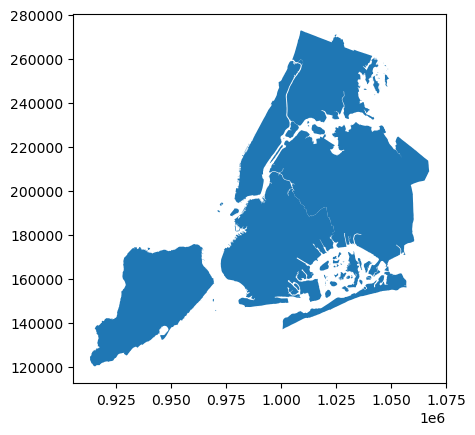

In [39]:
df.plot()

In [40]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich